In [82]:
import pandas as pd
excel_file_path = "/home/samir/Desktop/rudraAnalytics/sub_projects/forecast_avenue/data/Walmart.csv"
engine = 'xlrd'  # or 'xlrd'

base = pd.read_csv(excel_file_path)

In [83]:
df = base.copy()

In [84]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


#since dataframe is a time series based data lets index it from date and check if temporal flow continuous or not

In [85]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

In [86]:
# # df.sort_index(inplace=True)
# df['diff'] = df.index.to_series().diff().dt.days
# df['diff'].value_counts()

#here the difference is consistently 7 and giving us weekly data so no need to generate diff again

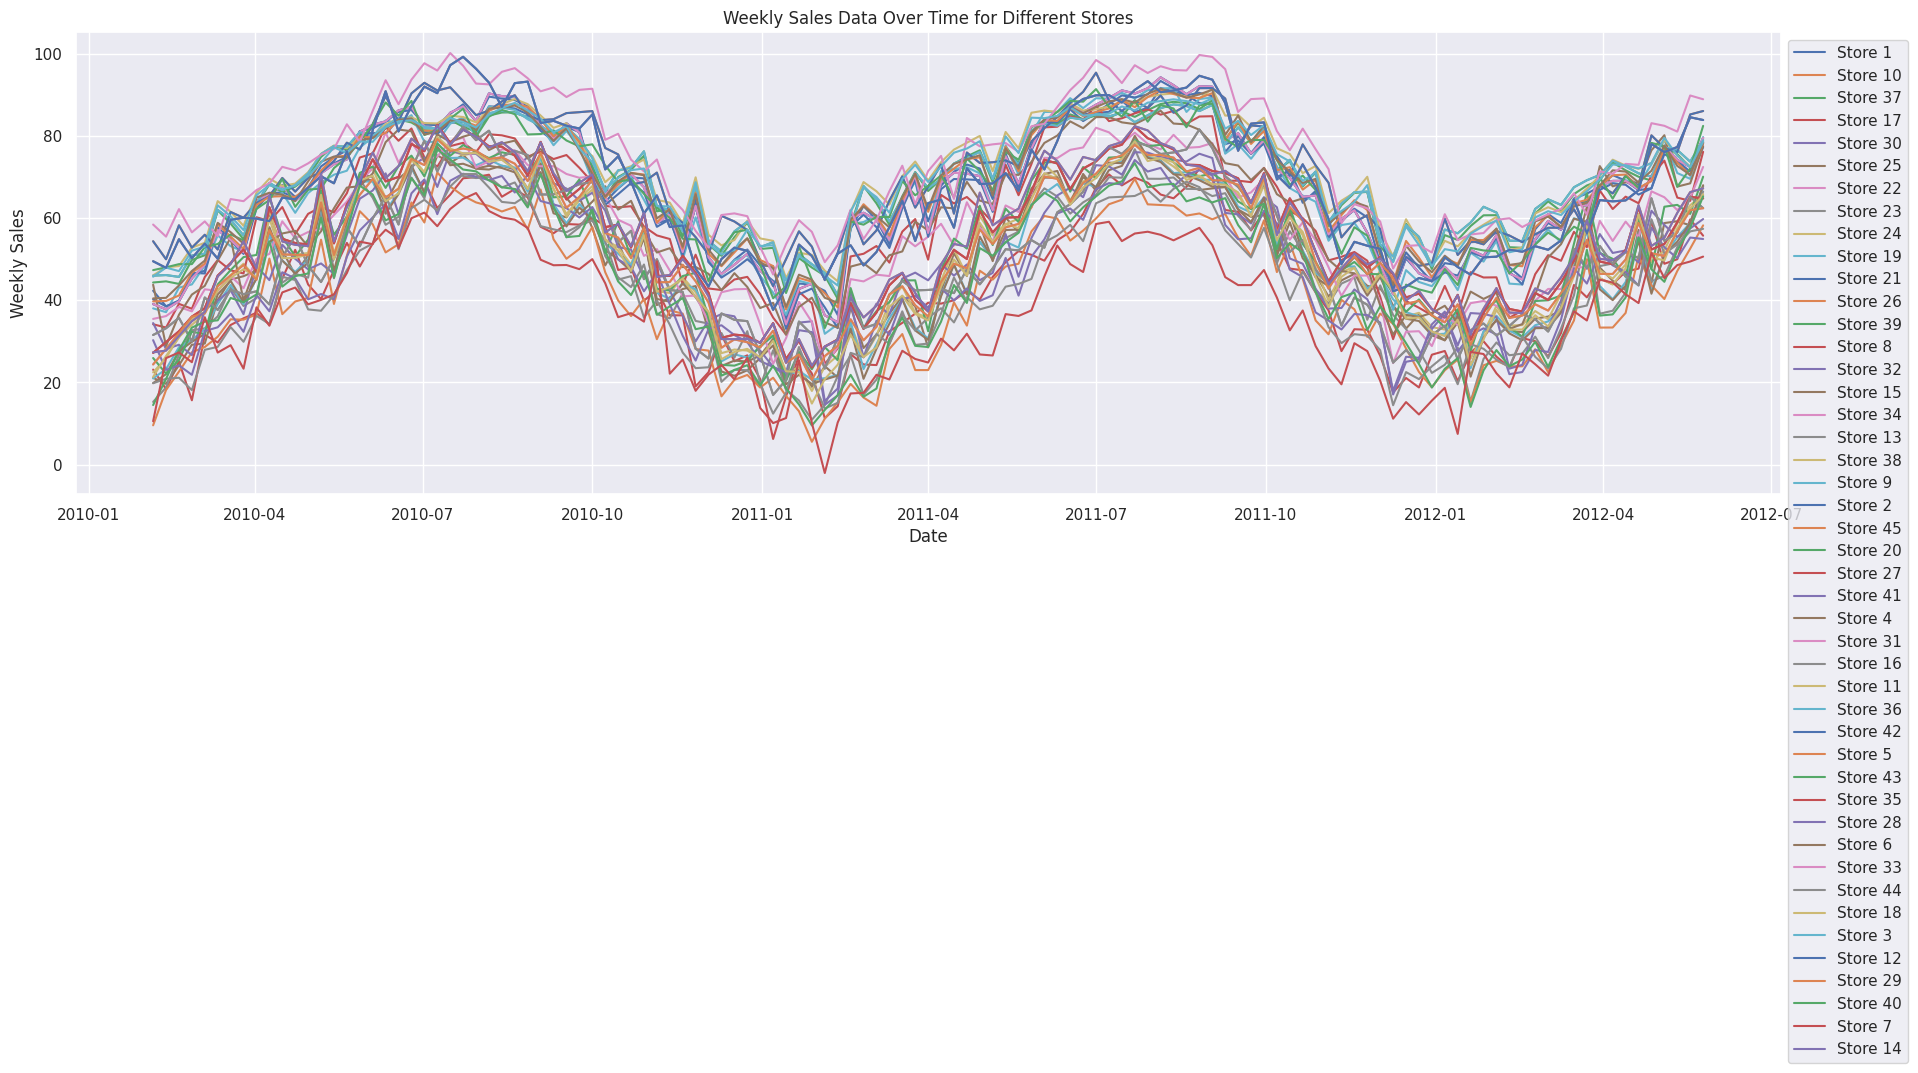

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_sorted = df.sort_index()

plt.figure(figsize=(22, 6))

sales_data = df_sorted.loc['2010-01': '2012-05']


sns.set()
for store in sales_data['Store'].unique():
    store_data = sales_data[sales_data['Store'] == store]
    plt.plot(store_data.index, store_data['Temperature'], label=f'Store {store}')

plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Data Over Time for Different Stores')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


In [103]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-10-05,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-10-12,45,734464.36,0,54.47,4.000,192.327265,8.667
